# Cutting Rod

## Descripción del problema

![1.png](1.png)

Dada una varilla de largo $n$ y un arreglo $p$ con los precios de cada varilla
dado su largo. En cuantas partes debo cortar la varilla para maximizar las
ganancias? Es la pregunta que busca responder el problema Cutting Rod.

Una varilla de $i$ unidades tendrá un costo asociado $p[i-1]$.

## Implementación recursiva

In [2]:
import math
"""
Cutting rod recursivo

Parametros:
---
p: arreglo de precios
n: tamaño de la barra
l: Nivel de identación de los prints
r: Nivel de recursión
v: Verbose? si/no 
! TODO : El algoritmo debe retornar los cortes 
"""
def r_cutting_rod(p, n = -1, l = 0, v = False):
    # Proteger de entradas inválidas
    if n > len(p): raise Exception("Error: La barra ingresada es de tamaño" + 
     "mayor al arreglo de precios.")

    if n == -1: n = len(p) # Obtener n (no n-1 xD)
    if v: print(" " * (l*4) + "Se obtiene una barra de largo", n, "{")
    if n <= 0: 
        if v: print(" " * (l*4 + 4) + "Caso base \n" + " " * (l*4) + "}")
        return 0
    q = -math.inf # Almacena la ganancia mayor
    for i in range(n):

        if v: print (" " * 4*(l+1) + f"Se revisa el {i+1} corte, formando una barra de largo {n - i-1} y una de largo {i+1}")

        # Obtener costo del corte de manera recursiva
        c= p[i] + r_cutting_rod(p, n-i-1, l = l + 2) 

        if v: print (" " * 4*(l+1) + f"El corte en {i+1} genera una ganancia {c}")
        if v: print(" " * 4*(l+1) + f"El mayor entre {q} y {c} es {max(q,c)}");

        q = max(q,c) # Calcular si el corte actual conviene

        if v: print(" " * 4 *l + 4*" " + f"n = {n}, i = {i}, q = {q}, c = {c}")
    if v: print (" " * l * 4 + f"}} Máximo = {q}")
    return q # Devolver valor máximo de ganancia
print(r_cutting_rod([ 2, 3]))
print(r_cutting_rod([9, 17, 20, 24, 34, 35, 45, 49, 50, 59]))

4
90


## Implementación DP (Dynamic Programming)

In [3]:
import math
import numpy as np
"""
Cutting rod dinámico

Parametros:
---
p: arreglo de precios
n: tamaño de la barra
v: Verbose? si/no 
! TODO : El algoritmo debe retornar los cortes.
! TODO : verbose.
"""
def dp_cutting_rod(p, n = -1, v = False):
    if n == -1: n = len(p) # Obtener n automáticamente
    r = np.zeros((n+1), dtype = int)
    for i in range(1, n+1): # Recorre los elementos
        q = -math.inf # Guarda la ganancia máxima
        for j in range(i):
            q = max(q, p[j] + r[i-j-1]) # Se obtiene dinámicamente el subproblema
        r[i] = q # Se guarda el subproblema $i$
    return r[n] # Se retorna la máxima ganancia
print(dp_cutting_rod([9, 17, 20, 24, 34, 35, 45, 49, 50, 59]))

90


## Prueba de correctitud del algoritmo dinámico

Lema: El arreglo auxiliar posee las soluciones de todos los subproblemas 
anteriores

**Inicialización:** No existen subproblemas anteriores. ($i=0$).

**Mantención**: Se calcula el subproblema del corte en la posición actual ($i$).

**Finalización**: Todos los subproblemas han sido calculados
 correctamente.

El arreglo auxiliar que guarda los resultados contiene las solución final del
 problema.

## Prueba del tiempo de ejecución del algoritmo recursivo

Es posible definir la función de recursión $T(n)$ en términos de todos los
sub-problemas posibles (todos los cortes posibles). Esto es lograble iterando
$i$ de $0$ hasta $n-1$. Pasando efectivamente por todos los subproblemas.
La función de recurrencia $T(n)$ es la siguiente.

$$
T(n) = \sum_{i=0}^{n-1} {T(i)}
$$

Para probar el tiempo de ejecución se dice que $T(n) = 2^n$ es correcto para
un valor de $n$ arbitrario. Luego:

$$
T(n+1) = T(n) + \sum_{i=0}^{n-1} {T(i)}
$$

Reemplazando, obtenemos:

$$
T(n+1) = T(n) + T(n) 
$$

$$
2 \cdot 2^n = 2^{n+1}
$$


## Prueba del tiempo de ejecución del algoritmo DP

El tiempo de ejecución de esta rutina es $O(n^2)$ ya que cada subproblema
es resuelto exactamente una vez. Para resolver el subproblema en la posición
$i$, realizamos $i$ iteraciones del ciclo. 

Para calcular esto se define el tiempo de ejecución $T(n)$:

$$
\begin {aligned}
T(n) &= c \sum_{i = 0} ^ {n-1} \sum _ {j = 1}  ^ {i} j \\
&=  c \sum_{i = 0} ^ {n-1} j \\
&=  c \cdot \cfrac {n (n+1)} {2} \\
&=  O(n^2)


\end {aligned}
$$


## Experimentos

### Comparación DP / recursivo

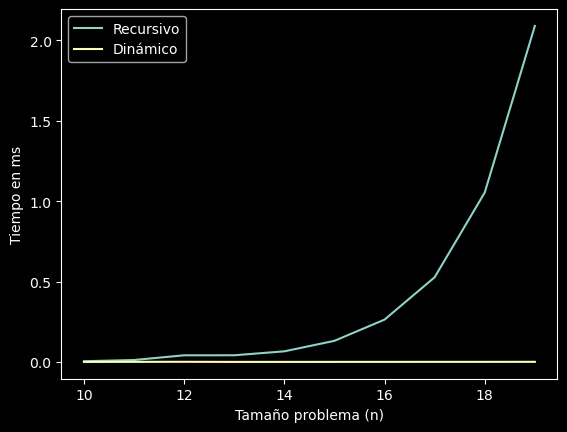

In [8]:
# Setup

from timeit import repeat as r
from random import randint
from matplotlib import pyplot as plt

fmi = "from __main__ import "
acr = "as cr"
import_recursive = fmi + "r_cutting_rod " + acr
import_dp = fmi + "dp_cutting_rod " + acr
n = 10
rpt = 1

def rand_arr(n):
    a = []; p = 0;
    for i in range(n):
        r = randint(1, 10);
        a.append(p+r)
        p += r
    return a


# Arrs
x = [];
y1 = [];
y2 = [];

# Do
for i in range(10, 20):
    a = rand_arr(i);
    t1 = r(
        setup = import_recursive,
        stmt = f"cr({a})",
        number = n,
        repeat = rpt
        )
    t2 = r(
        setup = import_dp,
        stmt = f"cr({a})",
        number = n,
        repeat = rpt
    )
    x.append(i)
    y1.append(t1)
    y2.append(t2)
# print(x)
# print(y1)
# print(y2)
# Graph
plt.clf() # clear
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Dinámico"])
plt.xlabel("Tamaño problema (n)")
plt.ylabel("Tiempo en ms")
plt.show()

Es posible observar que la solución dinámica es más eficiente que la chucha